In [1]:
from lark import Lark, Transformer
with open('grammar.lark', 'r') as f:
    grammar = f.read()

In [2]:
from rich import print
from lark.tree import Tree
from lark.visitors import Visitor, Discard
from lark.visitors import Interpreter

In [3]:
parser = Lark(grammar, parser='lalr')

In [4]:
script = """
graph TB
    A_1 --> B_1
    B_1 --> C_1[xyz]
    C_1 --> D_1
"""

In [5]:
from lark import ast_utils
import sys
import dsl_ast
dsl_ast_module = sys.modules['dsl_ast']


In [6]:
print(parser.parse(script))

start
└── flowchart
    ├── flow_type
    └── flow_statements
        ├── flow_statement
        │   ├── flow_step
        │   │   ├── A
        │   │   └── 1
        │   ├── None
        │   ├── flow_step
        │   │   ├── B
        │   │   └── 1
        │   ├── None
        │   └── 
        │       
        ├── flow_statement
        │   ├── flow_step
        │   │   ├── B
        │   │   └── 1
        │   ├── None
        │   ├── flow_step
        │   │   ├── C
        │   │   └── 1
        │   ├── dst_label
        │   │   └── xyz
        │   └── 
        │       
        └── flow_statement
            ├── flow_step
            │   ├── C
            │   └── 1
            ├── None
            ├── flow_step
            │   ├── D
            │   └── 1
            ├── None
            └──

In [7]:
from dsl_ast import ToAst
t = ast_utils.create_transformer(dsl_ast_module, ToAst())

In [8]:
a = t.transform(parser.parse(script))

In [9]:
print(a)

Flowchart(
    meta=<lark.tree.Meta object at 0x0000020814D5A110>,
    flow_type=Tree(Token('RULE', 'flow_type'), []),
    flow_statements=FlowStatements(
        statements=[
            FlowStatement(
                src=FlowStep(var=Token('__ANON_1', 'A'), num=Token('INT', 1)),
                slabel=None,
                dst=FlowStep(var=Token('__ANON_1', 'B'), num=Token('INT', 1)),
                dlabel=None
            ),
            FlowStatement(
                src=FlowStep(var=Token('__ANON_1', 'B'), num=Token('INT', 1)),
                slabel=None,
                dst=FlowStep(var=Token('__ANON_1', 'C'), num=Token('INT', 1)),
                dlabel=DstLabel(label=Token('__ANON_2', 'xyz'))
            ),
            FlowStatement(
                src=FlowStep(var=Token('__ANON_1', 'C'), num=Token('INT', 1)),
                slabel=None,
                dst=FlowStep(var=Token('__ANON_1', 'D'), num=Token('INT', 1)),
                dlabel=None
            )
        ]
    )
)

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_ast(ast):
    G = nx.DiGraph()
    for flow_statement in ast.flow_statements.statements:
        s = (flow_statement.src.var.value, flow_statement.src.num.value)
        d = (flow_statement.dst.var.value, flow_statement.src.num.value)
        G.add_edge(s, d)
        
    return G

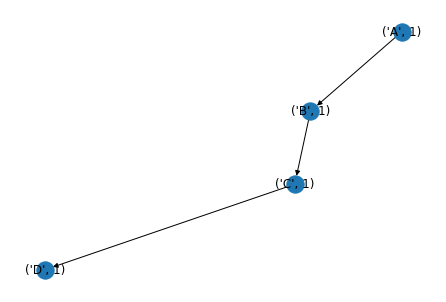

In [11]:
def show_graph(ast):
    G = visualize_ast(ast)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


ast = t.transform(parser.parse(script))
show_graph(ast)

In [12]:
from interpret import mk_compact, inc_compact, DslInterpreter

In [13]:
mk_compact(a)

[(('A', 1), ('B', 1)), (('B', 1), ('C', 1)), (('C', 1), ('D', 1))]

In [14]:
inc_compact(mk_compact(a))

[(('A', 2), ('B', 2)), (('B', 2), ('C', 2)), (('C', 2), ('D', 2))]

unet!

![unet architecture](docs/u-net-architecture.png)

base case:

```a1 ---f1---> b1```

inductive step:

```
a1 -------f1------ > b1
\                   ^
 \ g1            j1/
  \>a2 ---f2--> b2/
```

to apply again, increment all numbers by 1 and repeat inductive step

e.g. depth 3:
```
a1 ----f1---- b1
\g1          /j1
 a2 ---f2---b2
  \g2      /j2
   a3--f3--b3
```

as mermaid:

```mermaid:
graph TB
    A_1 --> F_1
    F_1 --> B_1
```

In [16]:

unet_4 = DslInterpreter().apply(first_script="""
graph TB
    A_1 --> F_1
    F_1 --> B_1
""", then_script="""
graph TB
    A_1 --> G_1
    G_1 --> A_2
    A_2 --> F_2
    F_2 --> B_2
    B_2 --> J_1
    J_1 --> B_1
""",
times=4)

In [17]:
G = nx.DiGraph()
for statement in unet_4:
    G.add_edge(statement[0], statement[1])
G.add_edge("in", ("A", 1))
G.add_edge(("B", 1), "out")

In [18]:
G.nodes(data=True)

NodeDataView({('A', 1): {}, ('F', 1): {}, ('B', 1): {}, ('G', 1): {}, ('A', 2): {}, ('F', 2): {}, ('B', 2): {}, ('J', 1): {}, ('G', 2): {}, ('A', 3): {}, ('F', 3): {}, ('B', 3): {}, ('J', 2): {}, ('G', 3): {}, ('A', 4): {}, ('F', 4): {}, ('B', 4): {}, ('J', 3): {}, ('G', 4): {}, ('A', 5): {}, ('F', 5): {}, ('B', 5): {}, ('J', 4): {}, 'in': {}, 'out': {}})

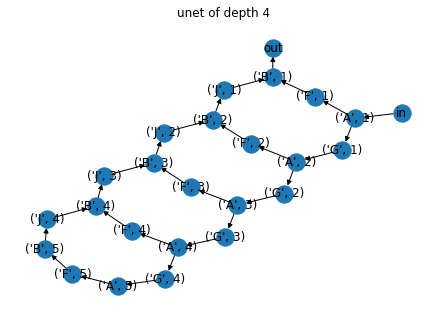

In [19]:
# pos = nx.multipartite_layout(G)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("unet of depth 4")
plt.show()

beautiful!

In [20]:
nx.to_dict_of_dicts(G)

{('A', 1): {('F', 1): {}, ('G', 1): {}},
 ('F', 1): {('B', 1): {}},
 ('B', 1): {'out': {}},
 ('G', 1): {('A', 2): {}},
 ('A', 2): {('F', 2): {}, ('G', 2): {}},
 ('F', 2): {('B', 2): {}},
 ('B', 2): {('J', 1): {}},
 ('J', 1): {('B', 1): {}},
 ('G', 2): {('A', 3): {}},
 ('A', 3): {('F', 3): {}, ('G', 3): {}},
 ('F', 3): {('B', 3): {}},
 ('B', 3): {('J', 2): {}},
 ('J', 2): {('B', 2): {}},
 ('G', 3): {('A', 4): {}},
 ('A', 4): {('F', 4): {}, ('G', 4): {}},
 ('F', 4): {('B', 4): {}},
 ('B', 4): {('J', 3): {}},
 ('J', 3): {('B', 3): {}},
 ('G', 4): {('A', 5): {}},
 ('A', 5): {('F', 5): {}},
 ('F', 5): {('B', 5): {}},
 ('B', 5): {('J', 4): {}},
 ('J', 4): {('B', 4): {}},
 'in': {('A', 1): {}},
 'out': {}}

In [21]:
from graphlib import TopologicalSorter

In [22]:
list(TopologicalSorter(nx.to_dict_of_dicts(G)).static_order())

['out',
 ('B', 1),
 ('F', 1),
 ('J', 1),
 ('B', 2),
 ('F', 2),
 ('J', 2),
 ('B', 3),
 ('F', 3),
 ('J', 3),
 ('B', 4),
 ('F', 4),
 ('J', 4),
 ('B', 5),
 ('F', 5),
 ('A', 5),
 ('G', 4),
 ('A', 4),
 ('G', 3),
 ('A', 3),
 ('G', 2),
 ('A', 2),
 ('G', 1),
 ('A', 1),
 'in']

In [23]:
nx.to_dict_of_lists(G)

{('A', 1): [('F', 1), ('G', 1)],
 ('F', 1): [('B', 1)],
 ('B', 1): ['out'],
 ('G', 1): [('A', 2)],
 ('A', 2): [('F', 2), ('G', 2)],
 ('F', 2): [('B', 2)],
 ('B', 2): [('J', 1)],
 ('J', 1): [('B', 1)],
 ('G', 2): [('A', 3)],
 ('A', 3): [('F', 3), ('G', 3)],
 ('F', 3): [('B', 3)],
 ('B', 3): [('J', 2)],
 ('J', 2): [('B', 2)],
 ('G', 3): [('A', 4)],
 ('A', 4): [('F', 4), ('G', 4)],
 ('F', 4): [('B', 4)],
 ('B', 4): [('J', 3)],
 ('J', 3): [('B', 3)],
 ('G', 4): [('A', 5)],
 ('A', 5): [('F', 5)],
 ('F', 5): [('B', 5)],
 ('B', 5): [('J', 4)],
 ('J', 4): [('B', 4)],
 'in': [('A', 1)],
 'out': []}

In [24]:
nx.to_dict_of_lists(G.reverse())

{('A', 1): ['in'],
 ('F', 1): [('A', 1)],
 ('B', 1): [('F', 1), ('J', 1)],
 ('G', 1): [('A', 1)],
 ('A', 2): [('G', 1)],
 ('F', 2): [('A', 2)],
 ('B', 2): [('F', 2), ('J', 2)],
 ('J', 1): [('B', 2)],
 ('G', 2): [('A', 2)],
 ('A', 3): [('G', 2)],
 ('F', 3): [('A', 3)],
 ('B', 3): [('F', 3), ('J', 3)],
 ('J', 2): [('B', 3)],
 ('G', 3): [('A', 3)],
 ('A', 4): [('G', 3)],
 ('F', 4): [('A', 4)],
 ('B', 4): [('F', 4), ('J', 4)],
 ('J', 3): [('B', 4)],
 ('G', 4): [('A', 4)],
 ('A', 5): [('G', 4)],
 ('F', 5): [('A', 5)],
 ('B', 5): [('F', 5)],
 ('J', 4): [('B', 5)],
 'in': [],
 'out': [('B', 1)]}

In [25]:
list(TopologicalSorter(nx.to_dict_of_dicts(G.reverse())).static_order())

['in',
 ('A', 1),
 ('F', 1),
 ('G', 1),
 ('A', 2),
 ('F', 2),
 ('G', 2),
 ('A', 3),
 ('F', 3),
 ('G', 3),
 ('A', 4),
 ('F', 4),
 ('G', 4),
 ('A', 5),
 ('F', 5),
 ('B', 5),
 ('J', 4),
 ('B', 4),
 ('J', 3),
 ('B', 3),
 ('J', 2),
 ('B', 2),
 ('J', 1),
 ('B', 1),
 'out']

In [29]:
import torch
from typing import Callable, Any

module_var = str
module_constructor = Callable[[int], torch.nn.Module]

def mk_net(
    G: nx.DiGraph, 
    constructors: dict[module_var, module_constructor], 
    forwards: dict[module_var, Callable[[Any], Any]]
    ):
    top_sort = list(TopologicalSorter(nx.to_dict_of_dicts(G)).static_order())[::-1]
    module = torch.nn.Module()
    for (var, num) in top_sort:
        name = f"{var}_{num}"
        node = constructors[var](num)
        setattr(module, name, node)
    return module

    
def mk_forward(G: nx.DiGraph, module):
    order = list(TopologicalSorter(nx.to_dict_of_dicts(G.reverse())).static_order())
    state = {'in': torch.nn.Identity(), 'out': torch.nn.Identity()}
    # todo...
    
    